In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

num_of_iter=2000
eta=0.1 # Learning rate
x_u_list = np.array([[0,0],[0,1],[1,0],[1,1]]) 
y_u_list = np.array([[1],[-1],[-1],[1]])
input_dim, number_of_neuron_hidden_layer, number_of_output = 2,2,1

def g_function(x):
    """Activation function

    Function:
            g(h) = tanh (beta * h)
    with beta = 1
            g'(g)= beta * (1-g ^2 )

    Args:
        x (float): input value

    Returns:
        float: output value
    """
    return np.tanh(x)

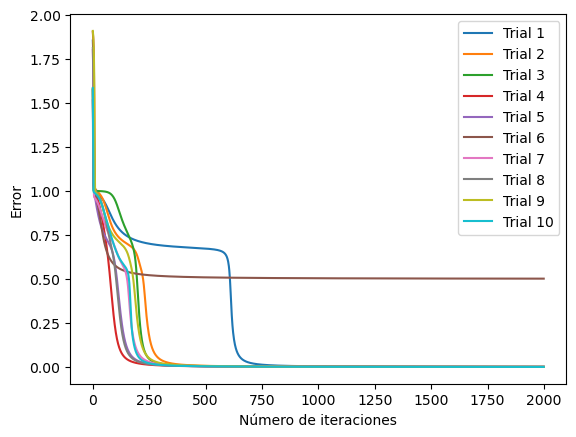

In [15]:
number_of_trials = 10 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

for idx_num_of_trial in range(number_of_trials):
    # 1. Initialize the weights to small random values. (layer 1)
    layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
    layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

    # 1. Initialize the weights to small random values. (layer 2)
    layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
    layer2_bias = np.random.uniform(size=(1,number_of_output))

    for i in range(num_of_iter):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
        layer1_hj += layer1_bias           #Bias

        # Propagate the signal forwards through the network
        layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

        layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
        layer2_hi += layer2_bias
        layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

        # Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
        
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # Compute the delta for the hidden layer
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
        
        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error,1))

for i_idx in range(number_of_trials):
   plt.plot(error[i_idx,:] , label='Trial '+str(i_idx+1))

plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()

fig1 = plt.gcf()
fig1.savefig('Ejercicio1-PartA-error.png')
plt.show()

# Save image for the report
# plt.savefig('Ejercicio1-PartA-error.png')

### Parte B

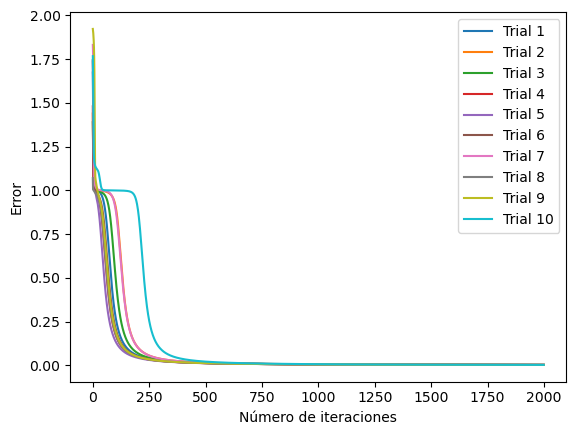

In [3]:
number_of_trials = 10
num_of_iterations=2000
error_model_2 = np.zeros([number_of_trials,num_of_iterations])
for i_idx in range(number_of_trials):
    layer1_wjk = np.random.uniform(size=(1,2))
    layer1_bias = np.random.uniform(size=(1,1))

    layer2_Wij = np.random.uniform(size=(1,3)) # The first two are for the input layer and the last one is for the hidden layer
    layer2_bias = np.random.uniform(size=(1,1))

    for i in range(num_of_iterations):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)            #Aca hago la suma de los wijx
        layer1_hj += layer1_bias                        # Assumed that bias = 1 * wjk  
        layer1_Vj = g_function(layer1_hj)       

        layer2_hi = np.dot( np.concatenate( [x_u_list, layer1_Vj],axis=1) ,layer2_Wij.T) # The input is the concatenation of the input and the hidden layer
        layer2_hi += layer2_bias
        layer2_Oi = g_function(layer2_hi)

        # 4. Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Oi**2) * (y_u_list-layer2_Oi) # g'(h_i) * (y_i - V_i)
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # 5 Compute the delta for the hidden layers
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_Wij[0,2])) # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(np.concatenate([x_u_list, layer1_Vj],axis=1))
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)

        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_Wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error_model_2[i_idx,i] = np.sum((y_u_list-layer2_Oi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error_model_2,0))


for i_idx in range(number_of_trials):
   plt.plot(error_model_2[i_idx,:] , label='Trial '+str(i_idx+1))

plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()
plt.show()

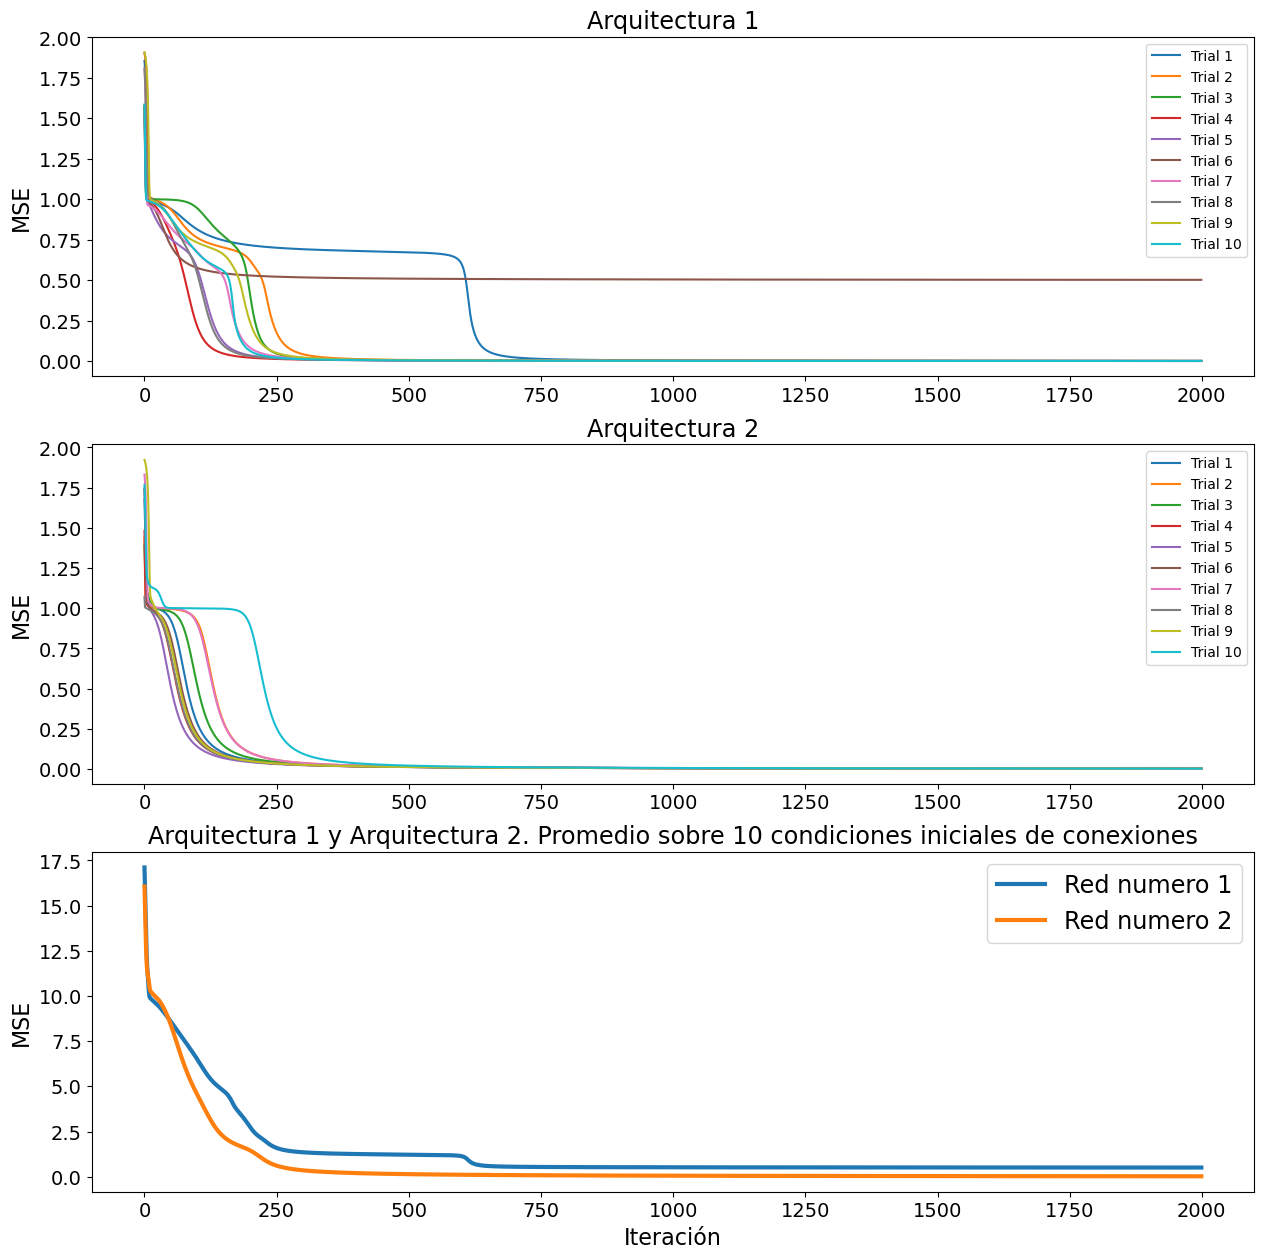

In [16]:

fig , axes =plt.subplots(figsize=(15,15))
axes.axis('off')

plt.subplot(311)
plt.title('Arquitectura 1',fontsize='xx-large')

for i_idx in range(number_of_trials):
    plt.plot(error[i_idx,:] , label='Trial '+str(i_idx+1))
plt.ylabel('MSE',fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(312)
plt.title('Arquitectura 2',fontsize='xx-large')

for i_idx in range(number_of_trials):
    plt.plot(error_model_2[i_idx,:] , label='Trial '+str(i_idx+1))
plt.ylabel('MSE',fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(313)
plt.title('Arquitectura 1 y Arquitectura 2. Promedio sobre 10 condiciones iniciales de conexiones',fontsize='xx-large')
plt.plot(sum(error,0),linewidth=3)
plt.plot(sum(error_model_2,0),linewidth=3)
plt.legend(['Red numero 1','Red numero 2'],fontsize='xx-large')
plt.xlabel('Iteración',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save image for the report
plt.savefig('Ejercicio1-PartB-error.png')

## Problema 2


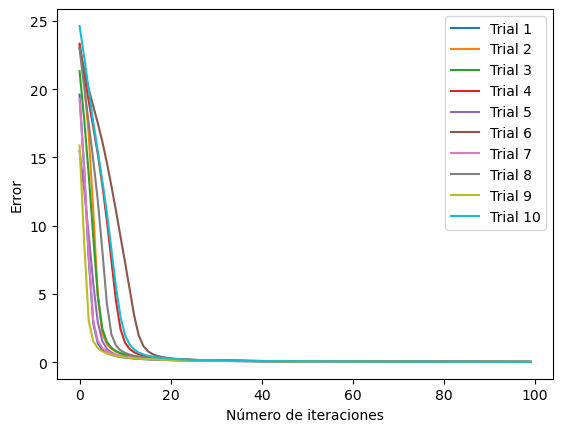

<Figure size 640x480 with 0 Axes>

In [3]:
num_of_iter = 100
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = list(itertools.product([1, -1], repeat=N))

for x_sample in x_u_list:
        # The output y is +1 if the product of inputs is +1, otherwise -1
        y_u_list = 1 if all(x_i == 1 for x_i in x_sample) else -1 if all(x_i == -1 for x_i in x_sample) else -1 #


# Model
input_dim = N
number_of_neuron_hidden_layer = 2
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 10 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])


for idx_num_of_trial in range(number_of_trials):
    # 1. Initialize the weights to small random values. (layer 1)
    layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
    layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

    # 1. Initialize the weights to small random values. (layer 2)
    layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
    layer2_bias = np.random.uniform(size=(1,number_of_output))

    for i in range(num_of_iter):
        layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
        layer1_hj += layer1_bias           #Bias

        # Propagate the signal forwards through the network
        layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

        layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
        layer2_hi += layer2_bias
        layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

        # Compute the delta for the output layer
        layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
        
        layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

        # Compute the delta for the hidden layer
        layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
        layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

        # 6. Compute the gradient of the error with respect to the weights
        layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
        layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
        
        # 6.1 Update the weights
        layer1_wjk += layer1_delta_wjk
        layer1_bias += layer1_delta_bias
        layer2_wij += layer2_delta_Wij
        layer2_bias += layer2_delta_bias

        # 7. Compute the error
        error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/4
        
# fig =plt.subplots(figsize=(15,5))
# plt.plot(sum(error,1))

for i_idx in range(number_of_trials):
   plt.plot(error[i_idx,:] , label='Trial '+str(i_idx+1))
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()
plt.show()

# Save image for the report
plt.savefig('Ejercicio2-PartA.png')

For multiple number of neurons in the hidden layer

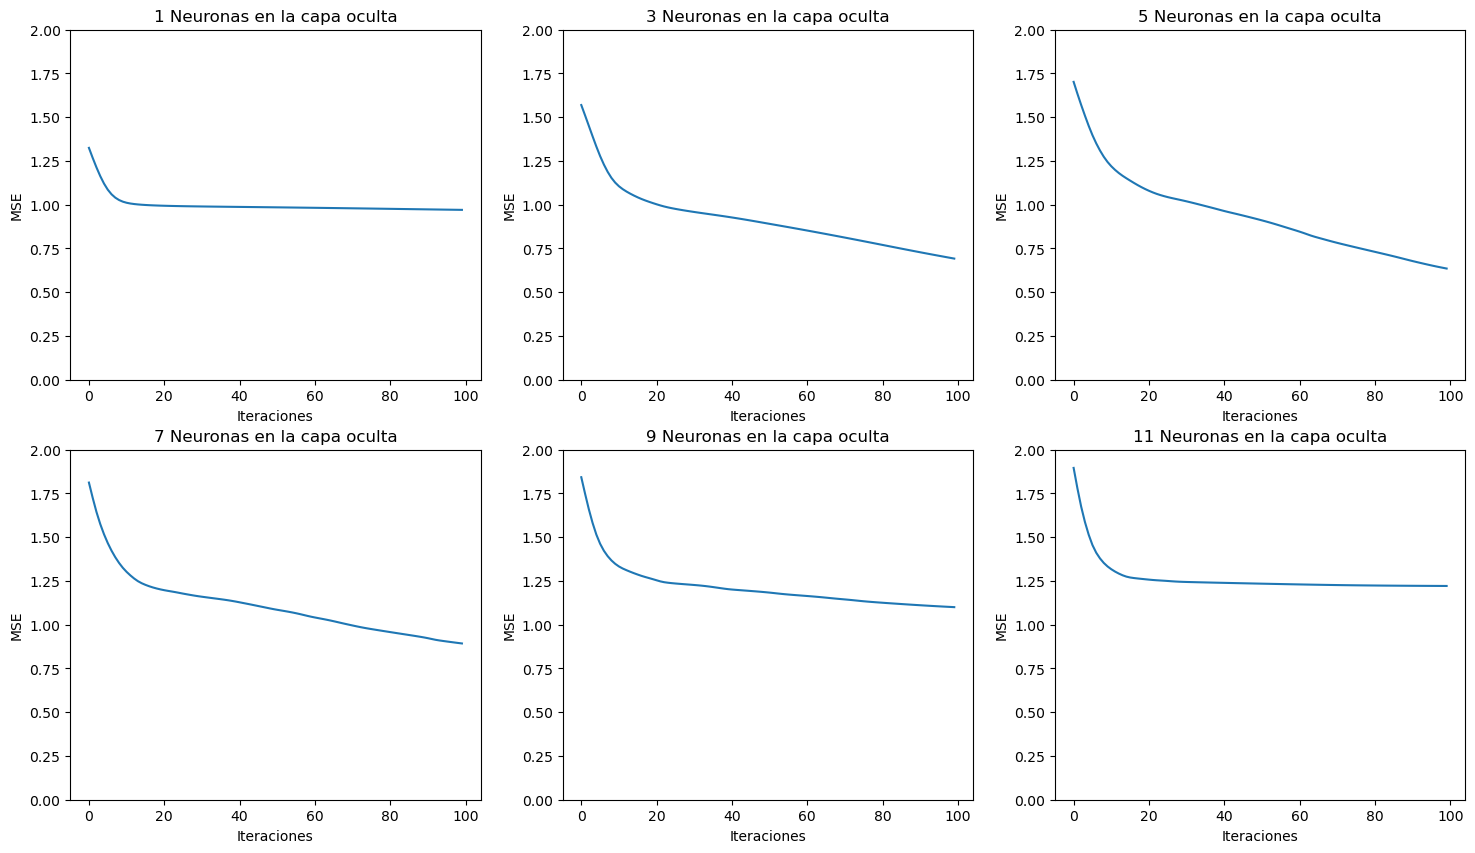

In [34]:
num_of_iter = 100
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = np.array(list(itertools.product([1, -1], repeat=N)))
# y_u_list = np.zeros(len(x_u_list))
y_u_list = np.prod(x_u_list,axis=1).reshape(-1,1)

# for i, x_sample in enumerate(x_u_list):
#     # The output y is +1 if the product of inputs is +1, otherwise -1
#     y_u_list[i] = 1 if np.prod(x_sample) == 1 else -1

    # y_u_list = 1 if np.prod(x_sample) ==1 else -1 #

# print the x_u_list and y_u_list to check the values of the inputs and outputs in the same order
# for x_sample, y_sample in zip(x_u_list, y_u_list):
#     print(f"x = {x_sample}, y = {y_sample}")


# Model
input_dim = N
number_of_neuron_hidden_layer = 11
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 50 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten axes for easy indexing

# Loop over different numbers of neurons in the hidden layer
for idx, number_of_neuron_hidden_layer in enumerate(neuron_counts):

    for idx_num_of_trial in range(number_of_trials):
        # 1. Initialize the weights to small random values. (layer 1)
        layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
        layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

        # 1. Initialize the weights to small random values. (layer 2)
        layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
        layer2_bias = np.random.uniform(size=(1,number_of_output))

        for i in range(num_of_iter):
            layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
            layer1_hj += layer1_bias           #Bias

            # Propagate the signal forwards through the network
            layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

            layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
            layer2_hi += layer2_bias
            layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

            # Compute the delta for the output layer
            layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
            
            layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

            # Compute the delta for the hidden layer
            layer1_delta_j = (1-layer1_Vj**2)*np.dot(layer2_delta_i,layer2_wij)  # g'(h_j) * sum_i(delta_i * w_ij)
            layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

            # 6. Compute the gradient of the error with respect to the weights
            layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
            layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
            
            # 6.1 Update the weights
            layer1_wjk += layer1_delta_wjk
            layer1_bias += layer1_delta_bias
            layer2_wij += layer2_delta_Wij
            layer2_bias += layer2_delta_bias

            # 7. Compute the error
            error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/(np.size(y_u_list))
            


# Plot the average error over all trials for this number of neurons
    avg_error = np.mean(error, axis=0)
    ax = axes[idx]
    ax.plot(avg_error)
    ax.set_title(f"{number_of_neuron_hidden_layer} Neuronas en la capa oculta")
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("MSE")
    # Set the y limits to be the same for all plots
    ax.set_ylim([0, 2])

fig2 = plt.gcf()
fig2.savefig('Ejercicio2-PartB.png')

plt.show()

# Save image for the report
# plt.savefig('Ejercicio2-PartB.png')



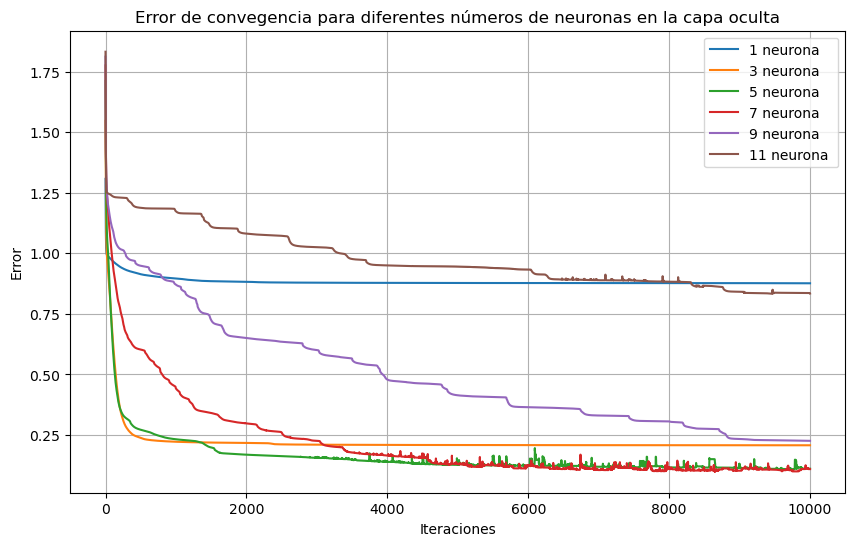

In [35]:
num_of_iter = 10000
eta = 0.01 # Learning rate  
N = 5 # Number of model input 

seed=43                        
np.random.seed(seed)

# Sample data
# Generate all possible combinations of N inputs, each input being either +1 or -1
x_u_list = list(itertools.product([1, -1], repeat=N))

# The output y es +1 if the product of inputs is +1, and -1 if the product of inputs is -1
y_u_list = np.prod(x_u_list, axis=1).reshape(-1, 1)

        


# Model
input_dim = N
# number_of_neuron_hidden_layer = 11
number_of_output = 1

neuron_counts = [1, 3, 5, 7, 9, 11]  # Neuron counts for hidden layer

number_of_trials = 50 # Number of time we want to run the training process with different initial conditions
error = np.zeros([ number_of_trials , num_of_iter])

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop over different numbers of neurons in the hidden layer
for idx, number_of_neuron_hidden_layer in enumerate(neuron_counts):

    for idx_num_of_trial in range(number_of_trials):
        # 1. Initialize the weights to small random values. (layer 1)
        layer1_wjk = np.random.uniform(size=(number_of_neuron_hidden_layer,input_dim)) 
        layer1_bias = np.random.uniform(size=(1,number_of_neuron_hidden_layer))

        # 1. Initialize the weights to small random values. (layer 2)
        layer2_wij = np.random.uniform(size=(number_of_output,number_of_neuron_hidden_layer)) 
        layer2_bias = np.random.uniform(size=(1,number_of_output))

        for i in range(num_of_iter):
            layer1_hj = np.dot(x_u_list,layer1_wjk.T)  #Activation h_j= x*w_jk
            layer1_hj += layer1_bias           #Bias

            # Propagate the signal forwards through the network
            layer1_Vj = g_function(layer1_hj)       #Activation function g(x) applied to h_jk. Output in the layer1

            layer2_hi = np.dot(layer1_Vj,layer2_wij.T)
            layer2_hi += layer2_bias
            layer2_Vi = g_function(layer2_hi) #Activation function g(x) applied to h_ij. Output in the layer 2. Output layer

            # Compute the delta for the output layer
            layer2_delta_i = (1-layer2_Vi**2) * (y_u_list-layer2_Vi) # g'(h_i) * (y_i - V_i)
            
            layer2_delta_bias = eta*np.sum(layer2_delta_i,0)

            # Compute the delta for the hidden layer
            layer1_delta_j = (1-layer1_Vj**2)*(layer2_delta_i.dot(layer2_wij))  # g'(h_j) * sum_i(delta_i * w_ij)
            layer1_delta_bias = eta*np.sum(layer1_delta_j,0)

            # 6. Compute the gradient of the error with respect to the weights
            layer2_delta_Wij = eta*layer2_delta_i.T.dot(layer1_Vj)
            layer1_delta_wjk = eta*(layer1_delta_j.T).dot(x_u_list)
            
            # 6.1 Update the weights
            layer1_wjk += layer1_delta_wjk
            layer1_bias += layer1_delta_bias
            layer2_wij += layer2_delta_Wij
            layer2_bias += layer2_delta_bias

            # 7. Compute the error
            error[idx_num_of_trial,i] = np.sum((y_u_list-layer2_Vi)**2)/(np.size(y_u_list))
            


    # Plot the average error over all trials for this number of neurons
    avg_error = np.mean(error, axis=0)
    plt.plot(avg_error, label=f'{number_of_neuron_hidden_layer} neurona ')

# Add labels and legend to the plot
plt.title("Error de convegencia para diferentes números de neuronas en la capa oculta")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.legend()
plt.grid(True)

# Adjust axis limits
ax = axes[idx]
ax.set_ylim([0, 2])


# Save image for the report
plt.savefig('Ejercicio2-PartC.png')

# Display the plot
plt.show()

# Save image for the report
# plt.savefig('Ejercicio2-PartC.png')

## Problema 3

In [27]:
"""
Modeling a logistic regression using a neural network with back-propagation

"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Set seed for reproducibility
seed=43                        
np.random.seed(seed)
tf.random.set_seed(seed)




def create_model():
    # Network architecture
    input_dim=1                            # Number of neurons in the input layer
    hidden_dim=5                            # Number of neurons in the hidden layer
    output_dim=1                            # Number of neurons in the output layer

    # ------------------------ Model-------------------------------------------------
    # Input layer
    input_layer=tf.keras.layers.Input(shape=(input_dim,), name='Input')
    # Hidden layer - Sigmoid activation function - Name Hidden_layer
    hidden_layer=tf.keras.layers.Dense(hidden_dim, activation='sigmoid', name='Hidden_layer')(input_layer)

    # Concatenate input and hidden layer
    concatenated_layer=tf.keras.layers.Concatenate(name='Concate')([input_layer, hidden_layer])

    # Output layer - Linear activation function
    output_layer=tf.keras.layers.Dense(output_dim, activation='linear', name = 'Output')(concatenated_layer)

    # Build the model
    model=tf.keras.Model(inputs=input_layer, outputs=output_layer)

    # Optimizer
    opt=tf.keras.optimizers.RMSprop(learning_rate=0.01)

    # Compile the model
    model.compile(optimizer=opt, loss='MSE')
    return model

# Create the model
model=create_model()

# Summary of the model
model.summary()

# Plot the model
tf.keras.utils.plot_model(model, to_file='Ejercicio3-model.png', show_shapes=True, show_layer_names=True, rankdir='LR')



n_examples_list = [5, 10, 100]

for n_examples in n_examples_list:
    # ---------------- Input data---------------------------------
    # Generate random data list for x
    x = np.random.uniform(low=0,high=1 ,size = n_examples).reshape(-1,1)   # Ensure consistent shape 
    # print(f"valore x: {x}")
    


    # Generate y data
    y = 4 * x * (1 - x)
    # print(f"valore y: {y}")

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    # Train the model
    history=model.fit(x=x_train, y=y_train,
                    epochs=1500,
                    batch_size=4,
                    shuffle=False,
                    validation_data=(x_test, y_test), 
                    verbose=False)


    # ---------------- Evaluate the model--------------------------------
    # Evaluate the model on the train set
    loss_train = model.evaluate(x_train, y_train, verbose=0)

    print(f"Example with {n_examples} Samples - Train loss {loss_train}")

    # Evaluate the model on the test set
    loss_test = model.evaluate(x_test, y_test, verbose=0)

    print(f"Example with {n_examples} Samples - Test loss {loss_test}")

    # Make predictions for 0 - 1 values
    x_predict = np.linspace(0, 1, 100).reshape(-1,1)
    y_predict = model.predict(x_predict)

    loss_predict = model.evaluate(x_predict, 4 * x_predict * (1 - x_predict), verbose=0)

    print(f"Example with {n_examples} Samples - Predict loss {loss_predict}")

    # Save training and test data in file for plotting
    np.savetxt(f'lr-train_{n_examples}.txt', np.concatenate((x_train, y_train), axis=1))
    np.savetxt(f'lr-test_{n_examples}.txt', np.concatenate((x_test, y_test), axis=1))


    # Save the predictions in file for plotting
    np.savetxt(f'lr-predictions_{n_examples}.txt', np.concatenate((x_predict, y_predict), axis=1))

    # Save error history values for plotting
    np.savetxt(f'lr-error_{n_examples}.txt', np.array([history.history['loss'], history.history['val_loss']]).T)







# encoded_log = model.predict(x_test, verbose=True)
# print(encoded_log.shape)




# # "Loss"
# plt.plot(np.sqrt(history.history['loss']))
# plt.plot(np.sqrt(history.history['val_loss']))
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hidden_layer        │ (None, 5)         │         10 │ Input[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concate             │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ Hidden_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │          7 │ Concate[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

Example with 5 Samples - Train loss 0.0034552006982266903
Example with 5 Samples - Test loss 0.0065576257184147835
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Example with 5 Samples - Predict loss 0.13479703664779663
Example with 10 Samples - Train loss 0.0015435443492606282
Example with 10 Samples - Test loss 0.005188242997974157
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
Example with 10 Samples - Predict loss 0.006808016914874315
Example with 100 Samples - Train loss 0.0001846222730819136
Example with 100 Samples - Test loss 0.0001385732612106949
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Example with 100 Samples - Predict loss 0.00017472448234912008


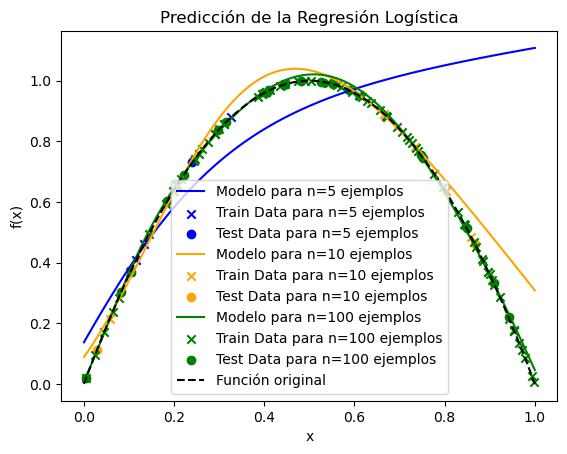

In [28]:
# List of colors
colors = ['blue', 'orange', 'green']

# Open the file for n=5,10,100 and read the data
for n_examples, color in zip(n_examples_list, colors):
    # Load
    data = np.loadtxt(f'lr-predictions_{n_examples}.txt')
    x_predict = data[:,0]
    y_predict = data[:,1]

    # Plot the data
    plt.plot(x_predict, y_predict, color= color, label=f'Modelo para n={n_examples} ejemplos')

    #Load the test and train data
    data_train = np.loadtxt(f'lr-train_{n_examples}.txt')
    x_train = data_train[:,0]
    y_train = data_train[:,1]

    data_test = np.loadtxt(f'lr-test_{n_examples}.txt')
    # if the data shape is 1D, reshape it to 2D
    if len(data_test.shape) == 1:
        data_test = data_test.reshape(-1, 2)

    x_test = data_test[:,0]
    y_test = data_test[:,1]

    # Plot the train and test data
    plt.scatter(x_train, y_train, color= color, label=f'Train Data para n={n_examples} ejemplos', marker='x')
    plt.scatter(x_test, y_test, color= color, label=f'Test Data para n={n_examples} ejemplos', marker='o')

# Plot the original function
x = np.linspace(0, 1, 100)
y = 4 * x * (1 - x)
plt.plot(x, y, "--", color='black', label='Función original')


# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Predicción de la Regresión Logística')


# Save image for the report
plt.savefig('Ejercicio3.png')

plt.show()




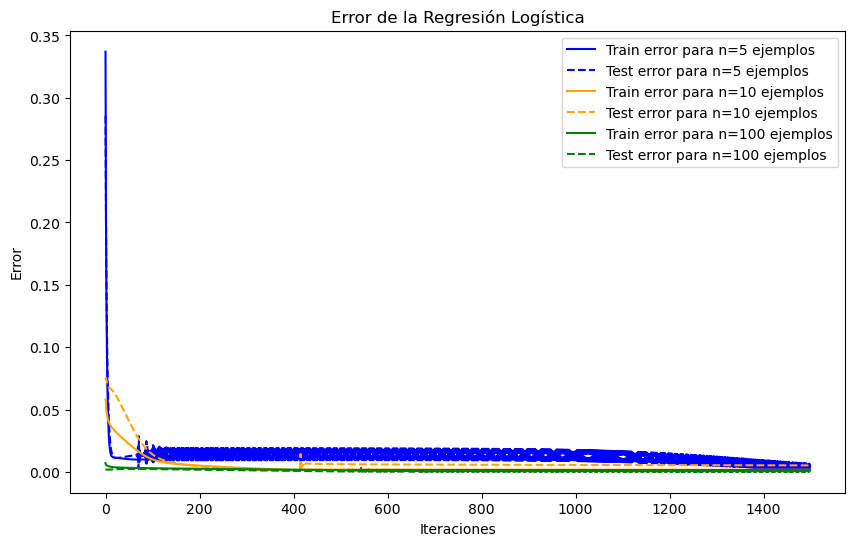

In [29]:
# Open error files for n=5,10,100 and read the data

# Set up the plot
plt.figure(figsize=(10, 6))
# List of colors
colors = ['blue', 'orange', 'green']

for n_examples,color in zip(n_examples_list,colors):
    # Load
    data = np.loadtxt(f'lr-error_{n_examples}.txt')
    train_error = data[:,0]
    test_error = data[:,1]

    # Plot the data. Train is solid and test is dashed
    plt.plot(train_error, "-",color = color ,label=f'Train error para n={n_examples} ejemplos')
    plt.plot(test_error, "--",color = color ,label=f'Test error para n={n_examples} ejemplos')

# Add labels and legend
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.legend()
plt.title('Error de la Regresión Logística')

# Save image for the report
plt.savefig('Ejercicio3-error.png')

plt.show()





In [ ]:
# #####################################################################
# # Output files
# fout=open("lr-out.dat","wb")
# ftrain=open("lr-train.dat","wb")
# ftest=open("lr-test.dat","wb")
# #
# np.savetxt(ftrain,np.c_[x_train,y_train],delimiter=" ")
# np.savetxt(ftest,np.c_[x_test, y_test],delimiter=" ")
# np.savetxt(fout,np.c_[x_test, encoded_log],delimiter=" ")

# W_Input_Hidden = model.layers[0].get_weights()
# W_Output_Hidden = model.layers[1].get_weights()
# # B_Input_Hidden = model.layers[0].get_weights()[1]
# # B_Output_Hidden = model.layers[1].get_weights()[1]
# #print(summary)
# print('INPUT-HIDDEN LAYER WEIGHTS:')
# print(W_Input_Hidden)
# print('HIDDEN-OUTPUT LAYER WEIGHTS:')
# print(W_Output_Hidden)

# # print('INPUT-HIDDEN LAYER BIAS:')
# # print(B_Input_Hidden)
# # print('HIDDEN-OUTPUT LAYER BIAS:')
# # print(B_Output_Hidden)